In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
fp13 = pd.read_csv('chain13accel.csv')
fp13 = fp13.drop(labels= {'Unnamed: 0'}, axis = 1)

fp7 = pd.read_csv('chain7accel.csv')
fp7 = fp7.drop(labels= {'Unnamed: 0'}, axis = 1)
fp7.head(2)

fp8 = pd.read_csv('chain8accel.csv')
fp23 = pd.read_csv('chain23accel.csv')
fp30 = pd.read_csv('chain30accel.csv')
fp38 = pd.read_csv('chain38accel.csv')


In [3]:
fp13.head(2)

e1ids  e1years    e1places   e1lats   e1lons  e2ids  e2years    e2places  \
0   1880     1534  Wittenberg  51.8671  12.6484   1882     1536  Wittenberg   
1   1882     1536  Wittenberg  51.8671  12.6484   1885     1538  Wittenberg   

    e2lats   e2lons  dists  velocity  spread  
0  51.8671  12.6484    0.0       0.0     0.5  
1  51.8671  12.6484    0.0       0.0     0.5

9 1.0
27 5.0


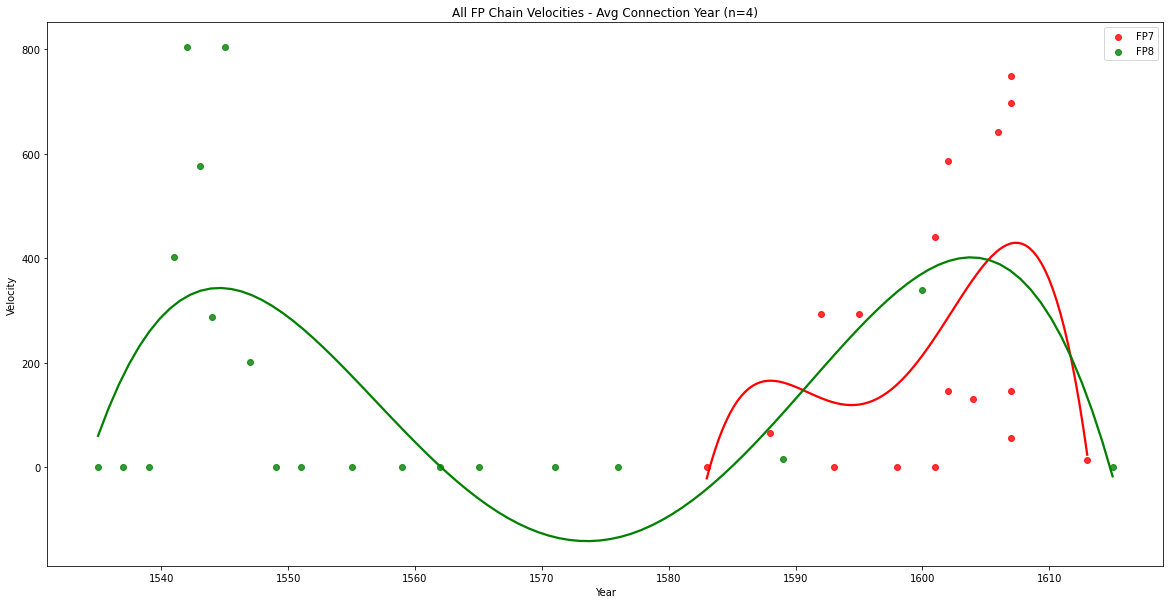

In [4]:
plt.figure(figsize = (20,10))
yearsList = []
speedsList = []
chains = [fp7, fp13]
color_list = ['r', 'g', 'b', 'k']
legend_list = ['FP7', 'FP8', 'FP13', 'FP38']
for ch, c, leg  in zip(chains, color_list, legend_list):
    yearsRange, velRange = [], []
    yearsAvg, velAvg = [], []
    for ind, row in ch.iterrows():
        y1 = row['e1years']
        y2 = row['e2years']
        v = row['velocity']
        # year range
        yRange = list(range(y1, y2))
        yearsRange.extend(yRange)
        
        # year average
        yAvg = np.floor(np.mean([y1, y2]))
        yearsAvg.append(yAvg)
        velAvg.append(v)
        for i in yRange:
            velRange.append(v)
    yearsList.append(yearsAvg)
    speedsList.append(velAvg)
    
    # Create a rolling average
    # 30 year range and 25 year overal
    begin = yRange[0]
    end = yRange[-1]
    allYears = end-begin
    steps = np.floor(allYears/5)
    print(allYears, steps)
    

    # ax = sns.regplot(x=yearsRange, y=velRange, order=3, ci = None, label=leg)
    ax = sns.regplot(x=yearsAvg, y=velAvg, order=4, ci = None, color= c, label=leg)
    ax.legend()
    ax.set_title('All FP Chain Velocities - Avg Connection Year (n=4)')
    ax.set_xlabel('Year')
    ax.set_ylabel('Velocity')
#plt.savefig('allChains_velocity_avg_n4.png', dpi = 300)

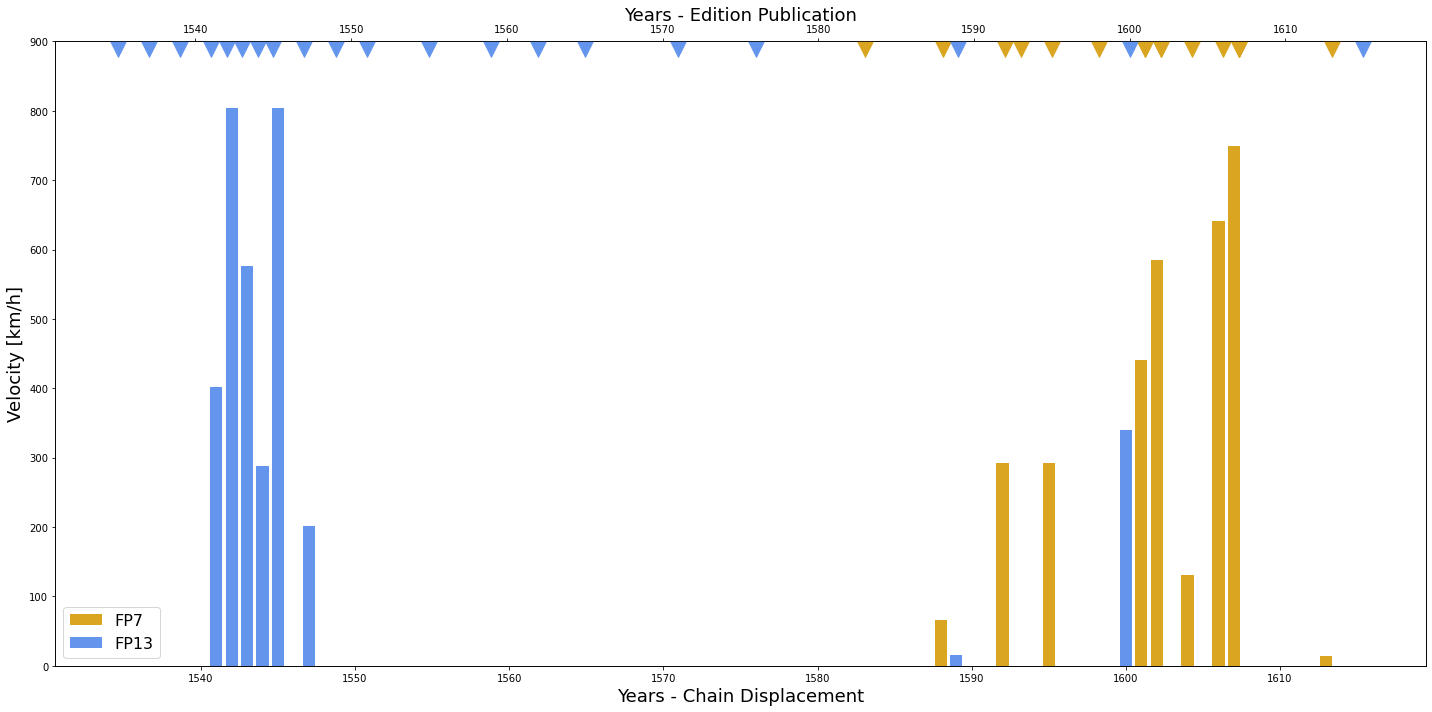

In [11]:
fig = plt.figure(figsize = (20,10))

ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
ax1.set_ylim(0,900)
legendList = ['FP7', 'FP13',]
barcols = [ 'goldenrod', 'cornflowerblue']

#plt.figure(figsize=(20,10))
for years, speeds, legends, barcol in zip(yearsList, speedsList, legendList, barcols):
    ax1.bar(years, speeds, label=legends, color = barcol)
    topY = [900 for x in range(len(years))]
    ax2.scatter(years, topY, color = barcol, label= legends+' Publication', marker = 'v', s=1000)
    ax1.legend(fontsize = 16, loc="lower left")
    ax1.set_xlabel('Years - Chain Displacement', fontsize = 18)
    ax2.set_xlabel('Years - Edition Publication', fontsize = 18)
    ax1.set_ylabel('Velocity [km/h]', fontsize= 18)
plt.tight_layout()
plt.savefig('Velocity_bars_publicationYears_LARGE.png', dpi = 600)




    #ax1.tight_layout()
    #ax1.xlabel('Year', fontsize = 16)
    #ax1.ylabel('Velocity [km/h]', fontsize = 16)



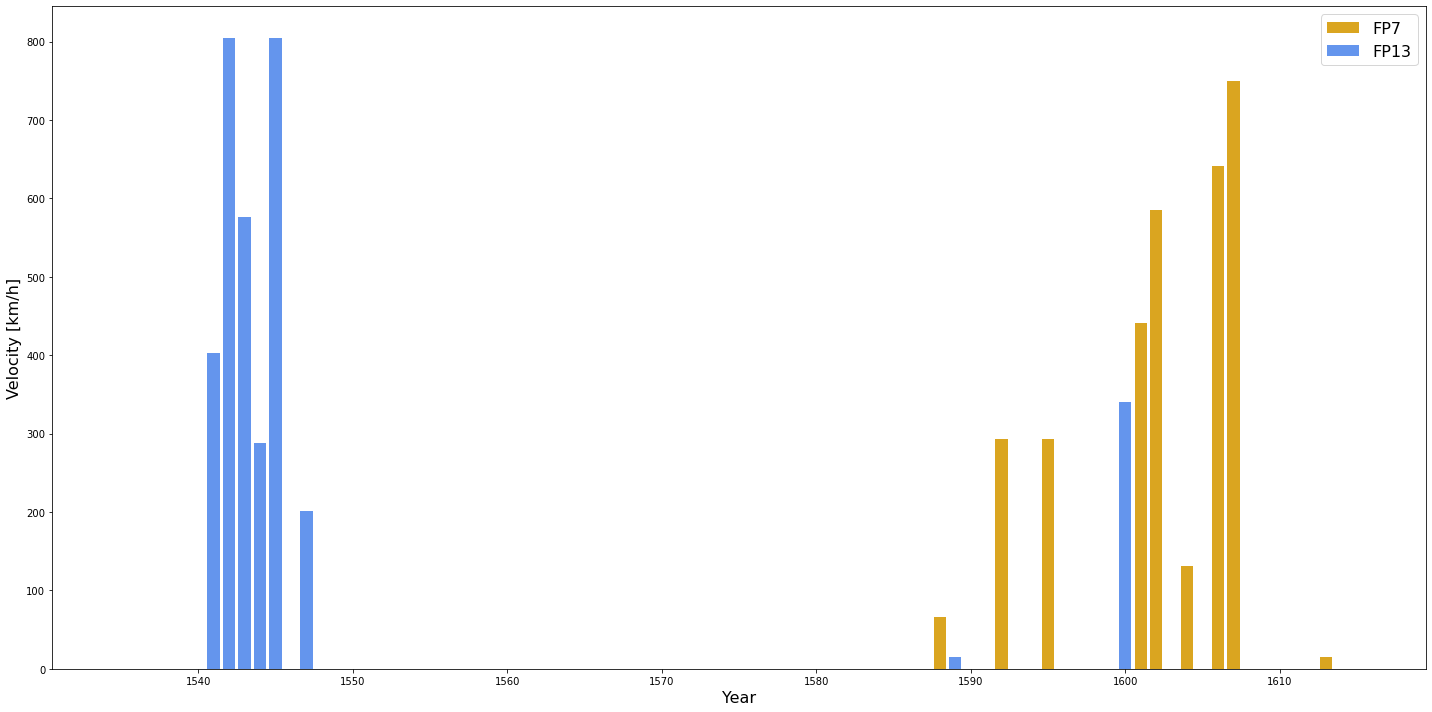

In [37]:
legendList = ['FP7', 'FP13']
barcols = [ 'goldenrod', 'cornflowerblue']
plt.figure(figsize=(20,10))
for years, speeds, legends, barcol in zip(yearsList, speedsList, legendList, barcols):
    plt.bar(years, speeds, label=legends, color = barcol)
    plt.legend(fontsize = 16)
    plt.tight_layout()
    plt.xlabel('Year', fontsize = 16)
    plt.ylabel('Velocity [km/h]', fontsize = 16)
plt.savefig('Velocity_bars.png', dpi=600)
    


Text(0.5, 1.0, 'fp13')

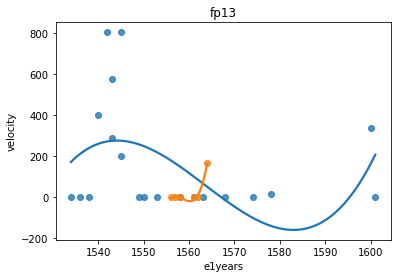

In [66]:
# ax = sns.regplot(x=fp13.index, y="velocity", data=fp13, order=3, ci = None)
ax = sns.regplot(x='e1years', y="velocity", data=fp13, order=3, ci = None)
ax = sns.regplot(x='e1years', y="velocity", data=fp38, order=3, ci = None)
ax.set_title('fp13')
#plt.savefig('fp13fitted.png', dpi=300)

Text(0.5, 1.0, 'fp7')

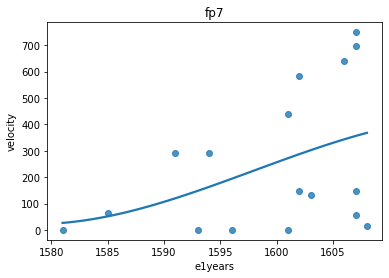

In [54]:
# ax = sns.regplot(x=fp7.index, y="velocity", data=fp7, order=3, ci = None)
ax = sns.regplot(x='e1years', y="velocity", data=fp7, order=3, ci = None)
ax.set_title('fp7')

#plt.savefig('fp7fitted.png', dpi=300)